# Mini Project 2
# Step 1
## Reading tweet replies (which were collected using Octaparse) from individual documents and writing them into one master file

In [60]:
replies = []

import os, glob
import pandas as pd
import csv

path = "/Users/pranathiiyer/Desktop/tweet_replies"

all_files = glob.glob(os.path.join(path, "*.txt"))

for f in all_files:
    with open(f,'r') as file:
        replies.append(file.readlines())

df = pd.DataFrame(replies)


In [61]:
df.to_csv('master_replies.csv')

# Step 2
## Preprocessing the text. Removing stop words from tweets and tokenizing them.

In [62]:
import gensim
from sklearn.feature_extraction.text import TfidfVectorizer
import numpy as np
import pandas as pd
from gensim import corpora, models
from gensim.utils import effective_n_jobs
import nltk

from nltk.stem.snowball import SnowballStemmer


tweet_regex = "[^a-z\s]"
tweet_stop = ['ki','k','h','ki','hai','ye','u','se','na','aage','ye','sh',
              'ha','gt','hi','f','ger','eh','ko','pe','t','r','ur','ht','b','sa','si','btw','ait',
             'tt','et','es','st','te','th','aa','get','aaa','let','kuch','mein','much','ka','bhi','pic','go','us', 'ae',
             'tel','ar','e','ah','ge','ct','gr','ke','e','ut','te','wt','ter','hy','gat','ga','ot','sar','de','ne','vt','wr',
              'ho','ver','hua','he','eet','tet','br','kr','one','toh','ji','g','bt','oh','jaa','hw','oe','hs','el','hw',
             'rahi','raha','sala','eer','v','hr','z','ty','bs','hh','ay','ta','jo','al','fa','fey','ts','het','ya','tha','ara','bh','tat',
             'gh','hf','er','hf','stg','orm','like','hain','kya','really','amt','fae','naiko','karu','eae','cot']

def tokenize_tweets(text_series):
    '''
    Cleans + tokenizes Pandas series of strings from the Salem Witch dataset.
    
    Returns pandas series of lists of tokens
    '''
    clean = text_series.str.lower() \
                       .str.replace(tweet_regex,
                                    " ",
                                    regex=True)

    stop = nltk.corpus.stopwords.words('english') + tweet_stop

    tokenize = lambda text: [i for i in nltk.word_tokenize(text) if i not in stop]
    tokens = clean.apply(tokenize)
    return tokens

<>:12: DeprecationWarning: invalid escape sequence \s
<>:12: DeprecationWarning: invalid escape sequence \s
/var/folders/sn/_p253mqn075638n3rt6km5l00000gn/T/ipykernel_20142/794034958.py:12: DeprecationWarning: invalid escape sequence \s
  tweet_regex = "[^a-z\s]"


In [63]:
df = pd.read_csv('/Users/pranathiiyer/Desktop/MACS30124/master_replies.csv',index_col=0)


In [64]:

tokens = tokenize_tweets(pd.Series(df['0']))

# Step 3
## Initializing series of tokens as gensim dictionary and converting it into a bag of words

In [65]:
def prepare_data(tokens):
    '''
    Prepares Pandas series of lists of tokens for use within a Gensim topic model
    
    Returns an id2word dictionary + bag of words corpus
    '''
   
    dictionary = corpora.Dictionary([i for i in tokens])
    
    bow_corpus = [dictionary.doc2bow(text) for text in tokens]
    
    return dictionary, bow_corpus

In [66]:
dictionary, bow_corpus = prepare_data(tokens)

# Step 4
## Computing coherence values for LDA models with various topics and plotting the coherence values 

In [67]:
def compute_coherence_values(dictionary, corpus, texts, limit, start=2, step=2):
    '''
    Computes Coherence values for LDA models with differing numbers of topics.
    
    Returns list of models along with their respective coherence values (pick
    models with the highest coherence)
    '''
    coherence_values = []
    model_list = []
    for num_topics in range(start, limit, step):
        model = models.ldamulticore.LdaMulticore(corpus=corpus,
                                                 id2word=dictionary,
                                                 num_topics= num_topics,
                                                 workers=effective_n_jobs(-1),
                                                 passes=60,
                                                 iterations=100)
        model_list.append(model)
        coherence_model = models.coherencemodel.CoherenceModel(model=model, 
                                                               corpus=corpus,
                                                               dictionary=dictionary,
                                                               coherence='u_mass')
        
        coherence_values.append(coherence_model.get_coherence())
    return model_list, coherence_values


In [68]:
model_list, coherence_values = compute_coherence_values(dictionary=dictionary, corpus=bow_corpus, 
                                                        texts = tokens,
                                                        limit=20, start=2, step=2)

Topic number 14 seems to have highest coherence score (even though the coherence does not seem to converge for the given set of documents.

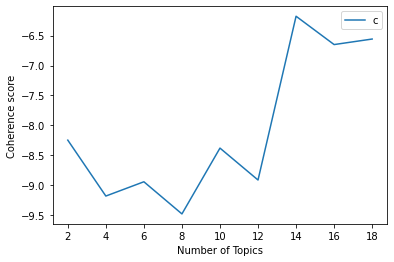

In [69]:
import matplotlib.pyplot as plt
plt.plot(range(2, 20, 2), coherence_values)
plt.xlabel("Number of Topics")
plt.ylabel("Coherence score")
plt.legend(("coherence_values"), loc='best')

In [15]:

! pip install gensim pyLDAvis -q
from gensim import corpora, models
import pyLDAvis
import pyLDAvis.gensim_models

# Step 5
## Printing out topics within topic number 14 and the top words within each of those topics along with a wordcloud for better visualization. I display all of these in my writeup.

Topic 11: 
['full', 'nation', 'pakistan', 'modiplanningfarmergenocide', 'nahi', 'pigs', 'bjp', 'bjpgoonsattackingfarmers', 'haryana', 'punjab', 'gist', 'log', 'sat', 'settle', 'vegetarian']
Topic 3: 
['india', 'syria', 'sanghi', 'fake', 'bjp', 'people', 'burhan', 'year', 'aap', 'become', 'fear', 'eit', 'sabka', 'mouth', 'politics']
Topic 6: 
['art', 'vegetarian', 'products', 'sik', 'lost', 'giving', 'think', 'khali', 'law', 'desh', 'shame', 'sikh', 'thanks', 'stop', 'yeah']
Topic 7: 
['evm', 'gara', 'country', 'kill', 'aur', 'punjab', 'kiya', 'fake', 'hota', 'news', 'sakte', 'bhai', 'yel', 'sik', 'hack']
Topic 1: 
['jai', 'kerala', 'modi', 'hindus', 'congress', 'vote', 'evm', 'north', 'india', 'telangana', 'dissappointed', 'madam', 'lo', 'time', 'dog']
Topic 8: 
['india', 'aajtak', 'god', 'acitel', 'aral', 'media', 'indian', 'nhi', 'apmaan', 'flag', 'desh', 'liye', 'khalistan', 'dare', 'protest']
Topic 12: 
['hindus', 'see', 'kashmir', 'ata', 'santa', 'vote', 'come', 'freedom', 'karo',

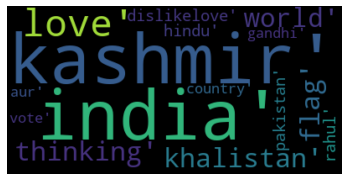

In [72]:
ldamodel = model_list[6]

for i, topic in ldamodel.show_topics(formatted=False, num_words=15):
    print('Topic {}: \n{}'.format(i, [w[0] for w in topic]))
    
    text = str([w[0] for w in topic])
   
    wc = WordCloud(max_words=20)
    wc.generate(text)
    wc.to_file('Topic'+str(i)+'.png')
    plt.imshow(wc, interpolation='bilinear')
    plt.axis("off")

# Step 6
## Using pyLDAvis to understand interactions between topics and word compostions in each of the topics

In [75]:
pyLDAvis.enable_notebook()
p = pyLDAvis.gensim_models.prepare(ldamodel, bow_corpus, dictionary)
p


PreparedData(topic_coordinates=              x         y  topics  cluster       Freq
topic                                                
11    -0.221025  0.063068       1        1  12.364106
0      0.063328  0.154654       2        1  11.184890
3      0.024657 -0.043227       3        1  10.235400
10     0.028825  0.108164       4        1  10.004573
1      0.121458 -0.016440       5        1   9.671065
13    -0.011056 -0.059630       6        1   7.929505
2     -0.030057 -0.126062       7        1   7.032473
8      0.014897 -0.030471       8        1   6.302275
7      0.024231 -0.018671       9        1   6.238002
12     0.031662  0.001678      10        1   5.700113
9      0.003948  0.003529      11        1   5.034843
5     -0.004808 -0.027057      12        1   3.843553
6     -0.044905 -0.007776      13        1   3.267192
4     -0.001156 -0.001760      14        1   1.192009, topic_info=          Term       Freq      Total Category  logprob  loglift
1742      full  13.000000  13.000000  Default  30.0000  30.0000
161     nation  14.000000  14.000000  Default  29.0000  29.0000
53    pakistan  13.000000  13.000000  Default  28.0000  28.0000
143    kashmir   9.000000   9.000000  Default  27.0000  27.0000
220       flag  14.000000  14.000000  Default  26.0000  26.0000
...        ...        ...        ...      ...      ...      ...
510     killed   0.229159   2.771280  Topic14  -5.3136   1.9369
640       real   0.229159   3.570713  Topic14  -5.3136   1.6834
682       army   0.229159   2.754108  Topic14  -5.3136   1.9431
1261      chal   0.229159   2.175407  Topic14  -5.3136   2.1790
1515    coward   0.229159   2.954608  Topic14  -5.3136   1.8728

[757 rows x 6 columns], token_table=      Topic      Freq       Term
term                            
2387     11  0.898107        aac
1647      3  0.376188        aaj
1647      4  0.376188        aaj
776       8  0.682858     aajtak
1501      3  0.386706        aap
...     ...       ...        ...
205      10  0.872922  yezplease
87       12  0.660479     yogiso
1254      1  0.977852      zakir
1420      2  0.424274      zinda
1420     11  0.424274      zinda

[963 rows x 3 columns], R=30, lambda_step=0.01, plot_opts={'xlab': 'PC1', 'ylab': 'PC2'}, topic_order=[12, 1, 4, 11, 2, 14, 3, 9, 8, 13, 10, 6, 7, 5])

In [76]:
pyLDAvis.save_html(p, 'lda.html')

/Users/pranathiiyer/opt/anaconda3/envs/Textanalysis/lib/python3.8/site-packages/past/builtins/misc.py:45: DeprecationWarning: the imp module is deprecated in favour of importlib; see the module's documentation for alternative uses
  from imp import reload
/Users/pranathiiyer/opt/anaconda3/envs/Textanalysis/lib/python3.8/site-packages/past/builtins/misc.py:45: DeprecationWarning: the imp module is deprecated in favour of importlib; see the module's documentation for alternative uses
  from imp import reload
/Users/pranathiiyer/opt/anaconda3/envs/Textanalysis/lib/python3.8/site-packages/past/builtins/misc.py:45: DeprecationWarning: the imp module is deprecated in favour of importlib; see the module's documentation for alternative uses
  from imp import reload
/Users/pranathiiyer/opt/anaconda3/envs/Textanalysis/lib/python3.8/site-packages/past/builtins/misc.py:45: DeprecationWarning: the imp module is deprecated in favour of importlib; see the module's documentation for alternative uses
 